<a href="https://colab.research.google.com/github/ravalika1010/task1/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-4 Exploratory Data Analysis - Terrorism

**Import libraries and read file data.csv**

In [ ]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import folium
from folium.plugins import MarkerCluster

**Read data to a** **dataframe**

In [ ]:
df= pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


### **Check for information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Columns: 135 entries, eventid to related
dtypes: float64(64), int64(17), object(54)
memory usage: 5.3+ MB


In [ ]:

df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,5.109000e+03,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5019.000000,5019.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,748.000000,5109.000000,5109.000000,5109.0,5109.000000,14.000000,1.0,5109.000000,4865.000000,5091.000000,89.000000,74.000000,79.000000,5.000000,5.000000,5.000000,0.0,0.0,0.0,5108.000000,10.000000,0.0,5108.000000,1346.000000,797.000000,...,193.000000,6.000000,5.0,0.0,0.0,0.0,11.000000,5108.000000,4284.000000,199.000000,178.000000,9.000000,8.000000,1.0,1.0,4494.000000,1044.000000,1026.000000,3318.000000,1018.000000,963.000000,5108.000000,2177.000000,1.261000e+03,5014.000000,359.000000,359.000000,144.000000,141.000000,4924.000000,1.510000e+02,1.0,5.000000e+01,0.0,241.000000,178.000000,5108.000000,5108.000000,5108.000000,5108.000000
mean,1.973879e+11,1973.817185,6.162263,15.290272,0.030730,271.241143,5.762772,36.569966,-26.344208,1.098454,0.004698,0.998043,0.985711,0.898219,-1.033862,1.387701,0.069877,0.899002,0.0,3.132316,4.214286,2.0,6.643179,39.513875,181.039678,10.202247,53.797297,215.392405,5.400000,32.800000,187.400000,NaN,NaN,NaN,0.027995,0.600000,NaN,0.002937,-45.335810,-84.223338,...,4.533679,0.833333,2.0,NaN,NaN,NaN,0.454545,6.434808,12.111578,6.437186,11.320225,7.666667,14.250000,6.0,16.0,0.734980,0.169540,0.209552,1.105184,0.396857,0.020768,0.500783,3.287092,1.378844e+05,0.071600,-5.977716,0.247911,-1.013889,36.829787,0.030869,1.374207e+06,20000.0,1.966980e+06,NaN,2.821577,8.286517,-3.124315,-3.057165,0.493344,-1.300313
std,2.338189e+08,2.340414,3.290684,9.156887,0.172602,204.553132,3.380250,22.807632,51.499821,0.593867,0.068385,0.044203,0.118689,0.302390,3.114782,0.635377,0.254964,0.301356,0.0,1.922060,2.516975,NaN,5.761382,28.603220,75.452083,6.346402,25.504219,63.821349,5.319774,23.889328,51.140004,NaN,NaN,NaN,0.164975,0.516398,NaN,0.054116,52.026389,35.650492,...,2.861409,0.408248,0.0,NaN,NaN,NaN,0.522233,1.965997,7.031045,1.704072,7.537757,2.692582,10.416333,NaN,NaN,3.219936,1.116851,2.743319,8.855526,2.629473,0.217682,1.203496,0.483917,1.330264e+06,0.257849,48.089065,6.170966,14.997429,84.821153,0.172981,5.605910e+06,NaN,6.206763e+06,NaN,1.296354,30.152380,4.430126,4.492086,0.717180,3.994105
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-43.532054,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,2.0,1.000000,1.000000,5.000000,1.000000,1.000000,30.000000,1.000000,8.000000,110.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,-99.000000,-99.000000,...,1.000000,0.000000,2.0,NaN,NaN,NaN,0.000000,2.000000,1.000000,2.000000,2.000000,5.000000,2.000000,6.0,16.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.972050e+11,1972.000000,3.000000,7.000000,0.000000,98.000000,1.000000,36.135357,-73.931351,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,2.000000,2.000000,2.0,2.000000,15.000000,110.000000,3.000000,25.000000,217.000000,2.000000,18.000000,161.000

In [ ]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999901,-0.061404,-0.009021,-0.015973,-0.083298,0.344669,0.032733,0.316315,0.020104,-0.021464,-0.035653,-0.027843,0.056149,-0.149644,-0.118204,-0.114718,0.099396,NaN,-0.093890,-0.040632,NaN,0.047440,0.041868,-0.186198,0.147765,0.173324,-0.015223,0.023180,-0.018625,0.191183,NaN,NaN,NaN,-0.127466,1.655890e-02,NaN,0.002952,0.444155,0.094870,...,0.025505,1.000000,NaN,NaN,NaN,NaN,0.405989,-0.034447,-0.184133,-0.167343,0.079255,-0.467474,-0.035581,NaN,NaN,0.018725,0.042639,0.068475,0.018764,0.008016,0.093329,0.124098,0.143959,0.010095,-0.013367,-0.059683,0.043399,0.045045,0.171997,-0.007406,0.077626,NaN,0.019441,NaN,0.129402,-0.163376,0.101244,0.095187,0.031306,0.163884
iyear,0.999901,1.000000,-0.075406,-0.009499,-0.016137,-0.084061,0.343685,0.032724,0.315289,0.020277,-0.021544,-0.035630,-0.027729,0.056137,-0.149869,-0.117829,-0.115069,0.099279,NaN,-0.092890,-0.031519,NaN,0.047501,0.041934,-0.185877,0.147880,0.173872,-0.013720,0.019574,-0.023974,0.195476,NaN,NaN,NaN,-0.127184,2.388820e-17,NaN,0.002708,0.444099,0.095572,...,0.025599,1.000000,NaN,NaN,NaN,NaN,0.385758,-0.033689,-0.183041,-0.167052,0.080492,-0.479463,-0.046374,NaN,NaN,0.018287,0.041912,0.067608,0.018264,0.007452,0.093400,0.124047,0.144568,0.009898,-0.013340,-0.058735,0.043261,0.048293,0.170305,-0.007108,0.076450,NaN,0.014711,NaN,0.128210,-0.163602,0.099884,0.093885,0.030131,0.162009
imonth,-0.061404,-0.075406,1.000000,0.034437,0.012589,0.059198,0.045983,-0.002266,0.050852,-0.014187,0.005312,0.000838,-0.006093,-0.002680,0.026417,-0.019251,0.032451,0.001920,NaN,-0.064867,-0.339848,NaN,-0.007602,-0.007389,-0.011197,-0.038697,-0.067511,-0.105851,0.282201,0.439892,-0.423324,NaN,NaN,NaN,-0.012317,7.000656e-01,NaN,0.014922,0.057327,-0.019361,...,-0.000817,1.000000,NaN,NaN,NaN,NaN,0.759041,-0.049410,-0.066370,-0.009748,-0.076009,0.587011,0.539142,NaN,NaN,0.030150,0.060298,0.073254,0.038055,0.043564,0.005353,-0.004951,-0.044869,0.015002,-0.001279,-0.057905,0.005040,-0.204249,0.105429,-0.021285,0.077343,NaN,0.275073,NaN,0.075017,0.019754,0.090105,0.086299,0.081305,0.122846
iday,-0.009021,-0.009499,0.034437,1.000000,0.012316,0.032379,-0.007186,-0.016935,0.000893,0.004788,0.016580,0.034777,-0.002848,0.002895,-0.005606,-0.044043,0.022001,-0.025414,NaN,-0.064551,0.103645,NaN,0.029825,0.023583,0.013907,-0.129453,-0.076207,-0.059883,-0.628432,-0.655067,-0.714653,NaN,NaN,NaN,-0.001022,-4.608882e-01,NaN,-0.014382,-0.027504,-0.034848,...,0.151753,-0.242065,NaN,NaN,NaN,NaN,-0.673364,-0.030105,-0.027880,0.044206,-0.014984,0.168826,-0.019256,NaN,NaN,0.003748,-0.006626,0.029277,-0.014747,-0.018613,0.009459,-0.002473,-0.016631,0.009451,-0.006118,0.012660,0.053033,-0.119674,-0.050046,0.002432,0.032100,NaN,0.029556,NaN,0.119900,-0.081811,0.024292,0.022821,0.031816,0.039565
extended,-0.015973,-0.016137,0.012589,0.012316,1.000000,-0.141406,-0.003273,-0.182838,0.010074,0.130911,0.004353,0.007885,0.021438,0.033682,-0.017000,-0.059347,-0.017664,0.055917,NaN,0.229688,0.318550,NaN,-0.046063,-0.043141,-0.003030,0.025833,0.040517,-0.213665,NaN,NaN,NaN,NaN,NaN,NaN,-0.023345,NaN,NaN,0.011297,0.274226,0.087734,...,0.176692,NaN,NaN,NaN,NaN,NaN,-0.559017,0.431431,-0.100761,0.002470,0.005835,0.046424,0.339422,NaN,NaN,-0.011744,0.197

**displaying the** **columns**

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

**the number of Terrorist Attacks and the number of Dead/Injured** **people**

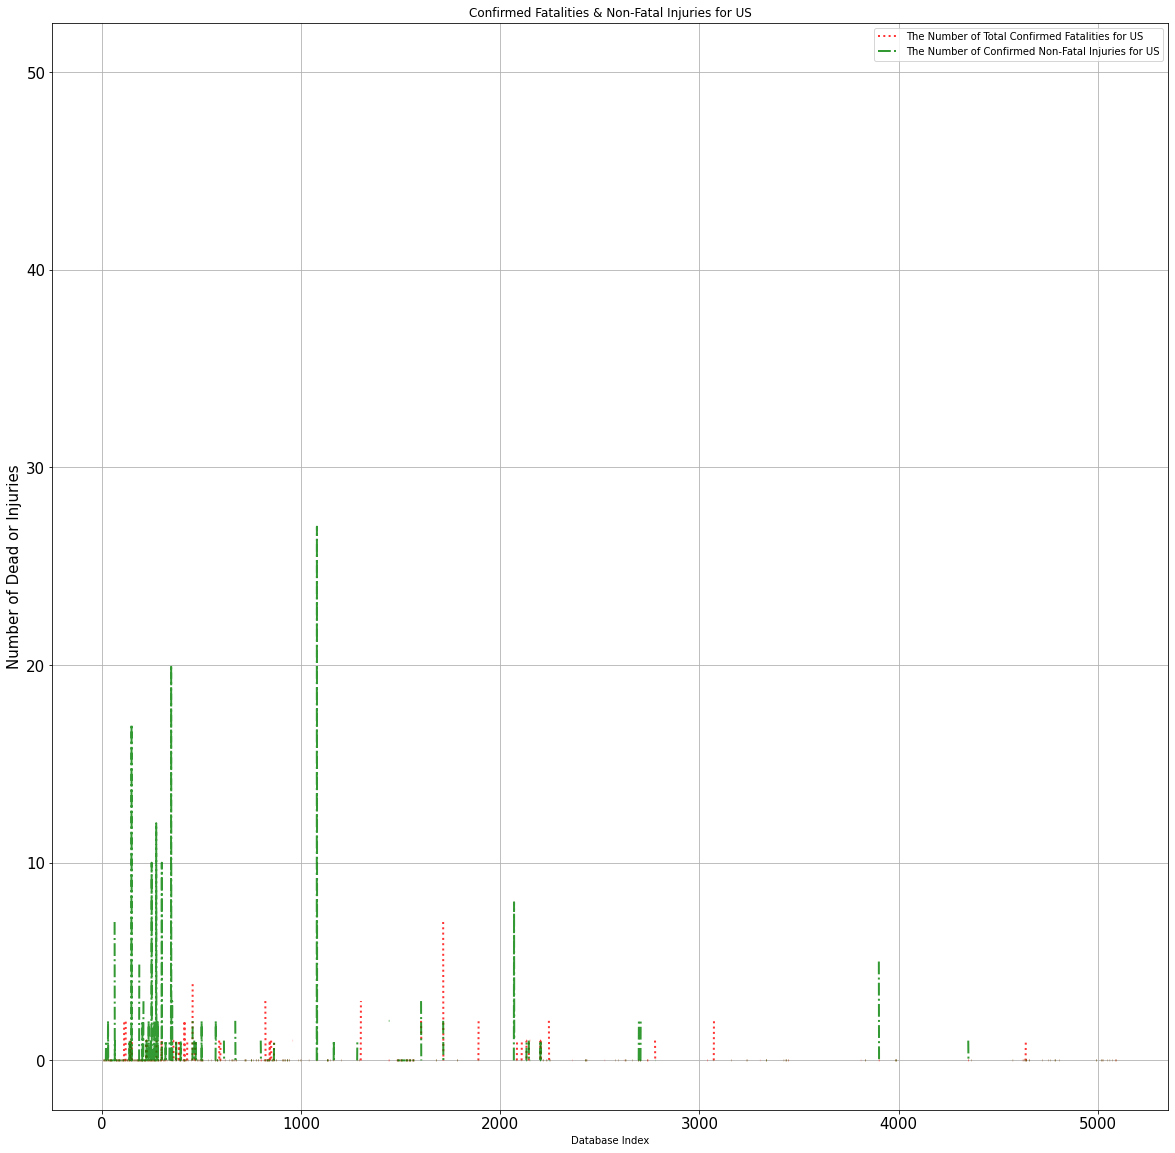

In [ ]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

**wound and kill**

**plotting**

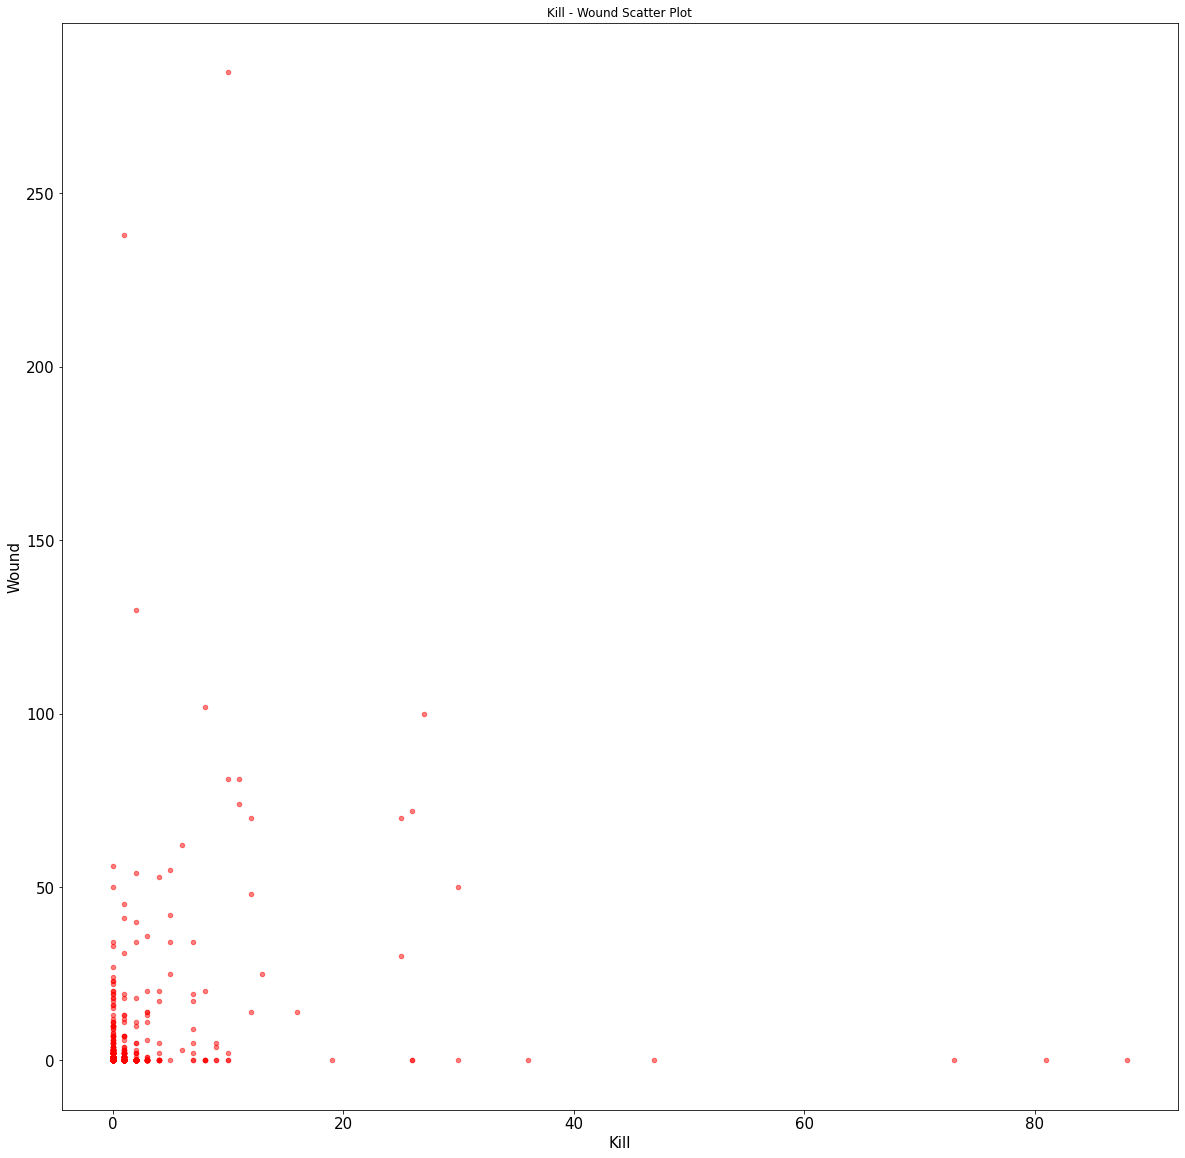

In [ ]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()


In the majority of acts of terrorism, the mortality rate and injuries were low, but a small number of actions led to too many deaths and injuries.

Frequency of Terrorist Actions in Customized Region

Let's analyze in Middle East and North Africa

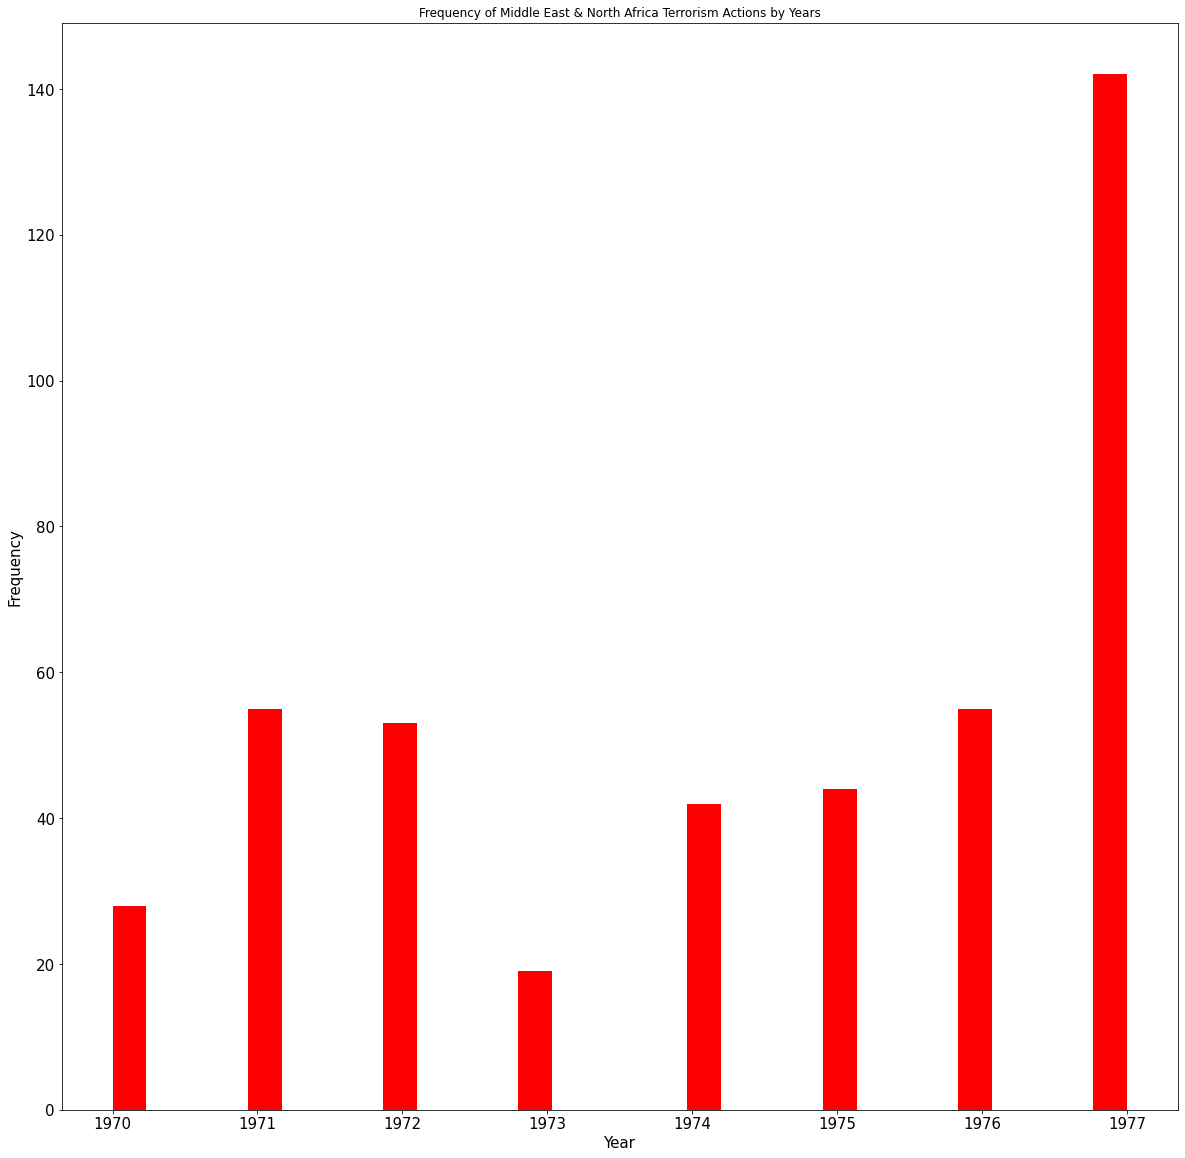

In [ ]:
middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

plotting number of dead

Terrorist attacks have increased in recent years

Comparing those who died in terror attacks in the World and Middle East & North Africa

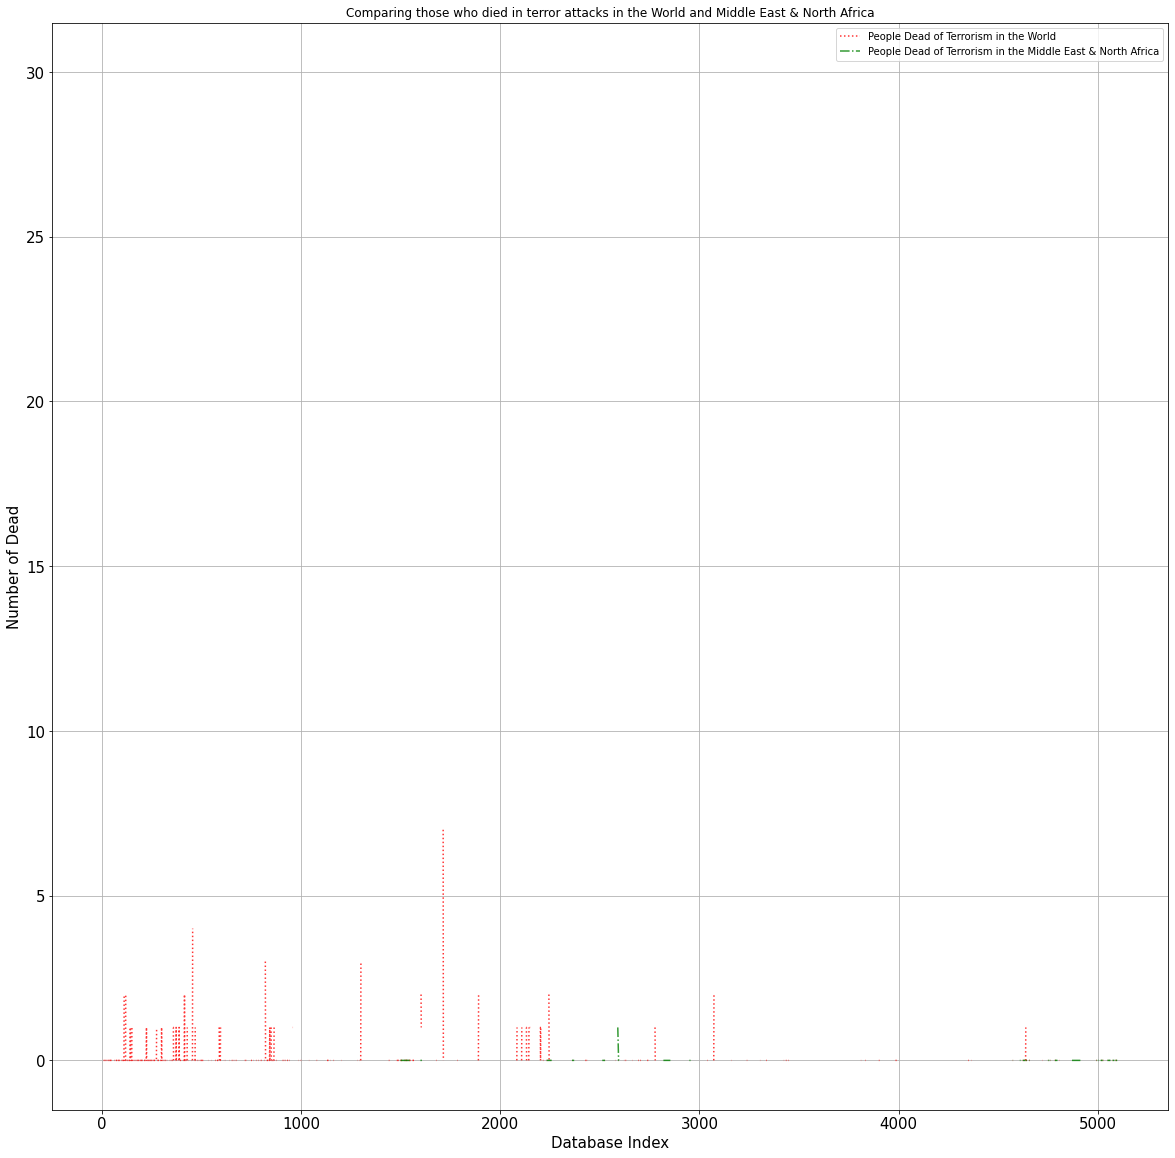

In [ ]:

df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

Terrorist Attacks of a Particular year and their Locations

Let's look at the terrorist acts in the world over a certain year

In [ ]:
filterYear = df['iyear'] == 1970

filterData information

In [ ]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

prints the number of people killed by terror attack

In [ ]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 3303


In [ ]:

attackData = df.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

displaying the column data 

In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,649.0,1141.0,1197.0,18.0,71.0,125.0,72.0,1.0,29.0


In [ ]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


**types of terrorist attacks that cause** **deaths**

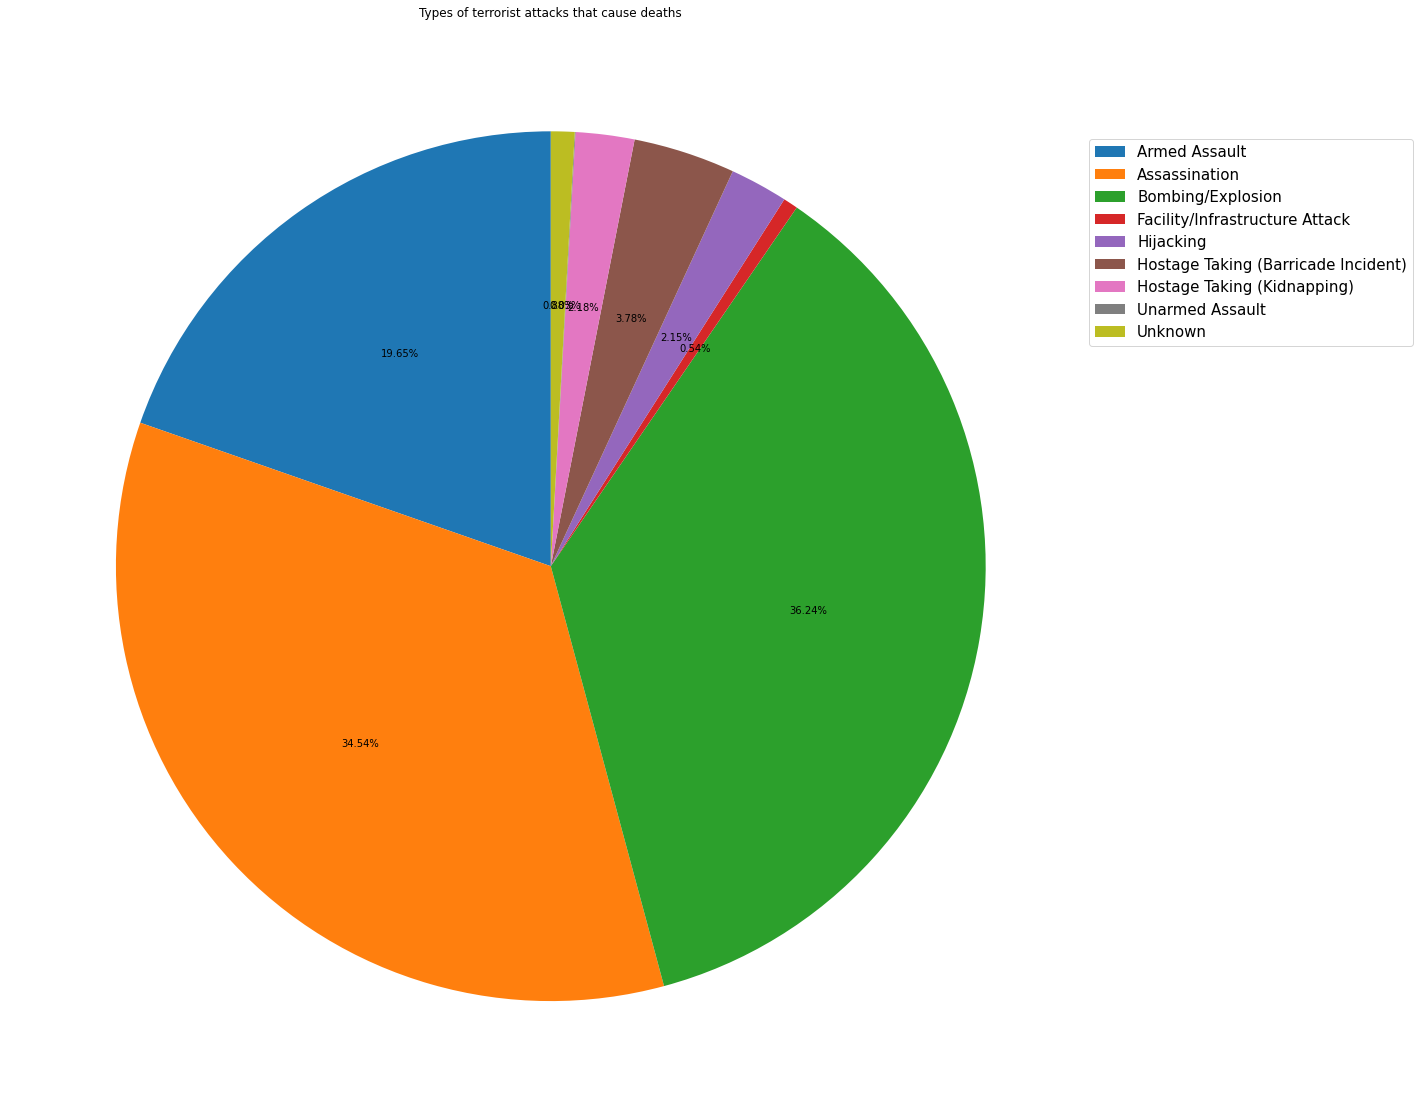

In [ ]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

Number of Killed in Terrorist Attacks

the data is displayed according by countries

In [ ]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Barbados,Belgium,Bolivia,Botswana,Brazil,Brunei,Cambodia,Canada,Chad,Chile,Colombia,Costa Rica,Cyprus,Czechoslovakia,Dominican Republic,East Germany (GDR),Ecuador,Egypt,El Salvador,Ethiopia,France,Greece,Guatemala,Haiti,Honduras,India,Iran,Iraq,Ireland,Israel,Italy,...,New Zealand,Nicaragua,Nigeria,North Yemen,Pakistan,Panama,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Saudi Arabia,Singapore,Somalia,South Africa,South Korea,South Vietnam,South Yemen,Spain,Sri Lanka,Sudan,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Trinidad and Tobago,Turkey,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Yugoslavia,Zaire,Zambia
nkill,0.0,0.0,0.0,0.0,298.0,1.0,9.0,0.0,0.0,73.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,0.0,0.0,19.0,0.0,1.0,26.0,1.0,1.0,1.0,1.0,7.0,8.0,20.0,114.0,33.0,0.0,0.0,4.0,22.0,12.0,58.0,132.0,103.0,...,0.0,11.0,3.0,0.0,6.0,0.0,2.0,0.0,0.0,94.0,0.0,3.0,0.0,0.0,0.0,6.0,1.0,81.0,0.0,99.0,1.0,3.0,4.0,47.0,7.0,25.0,0.0,2.0,0.0,34.0,1.0,1537.0,154.0,4.0,1.0,3.0,42.0,2.0,1.0,5.0


In [ ]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 93 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Afghanistan                     1 non-null      float64
 1   Algeria                         1 non-null      float64
 2   Andorra                         1 non-null      float64
 3   Angola                          1 non-null      float64
 4   Argentina                       1 non-null      float64
 5   Australia                       1 non-null      float64
 6   Austria                         1 non-null      float64
 7   Bahamas                         1 non-null      float64
 8   Bangladesh                      1 non-null      float64
 9   Barbados                        1 non-null      float64
 10  Belgium                         1 non-null      float64
 11  Bolivia                         1 non-null      float64
 12  Botswana                        1 non

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color

displaying number of people killed by countries in a bar graph

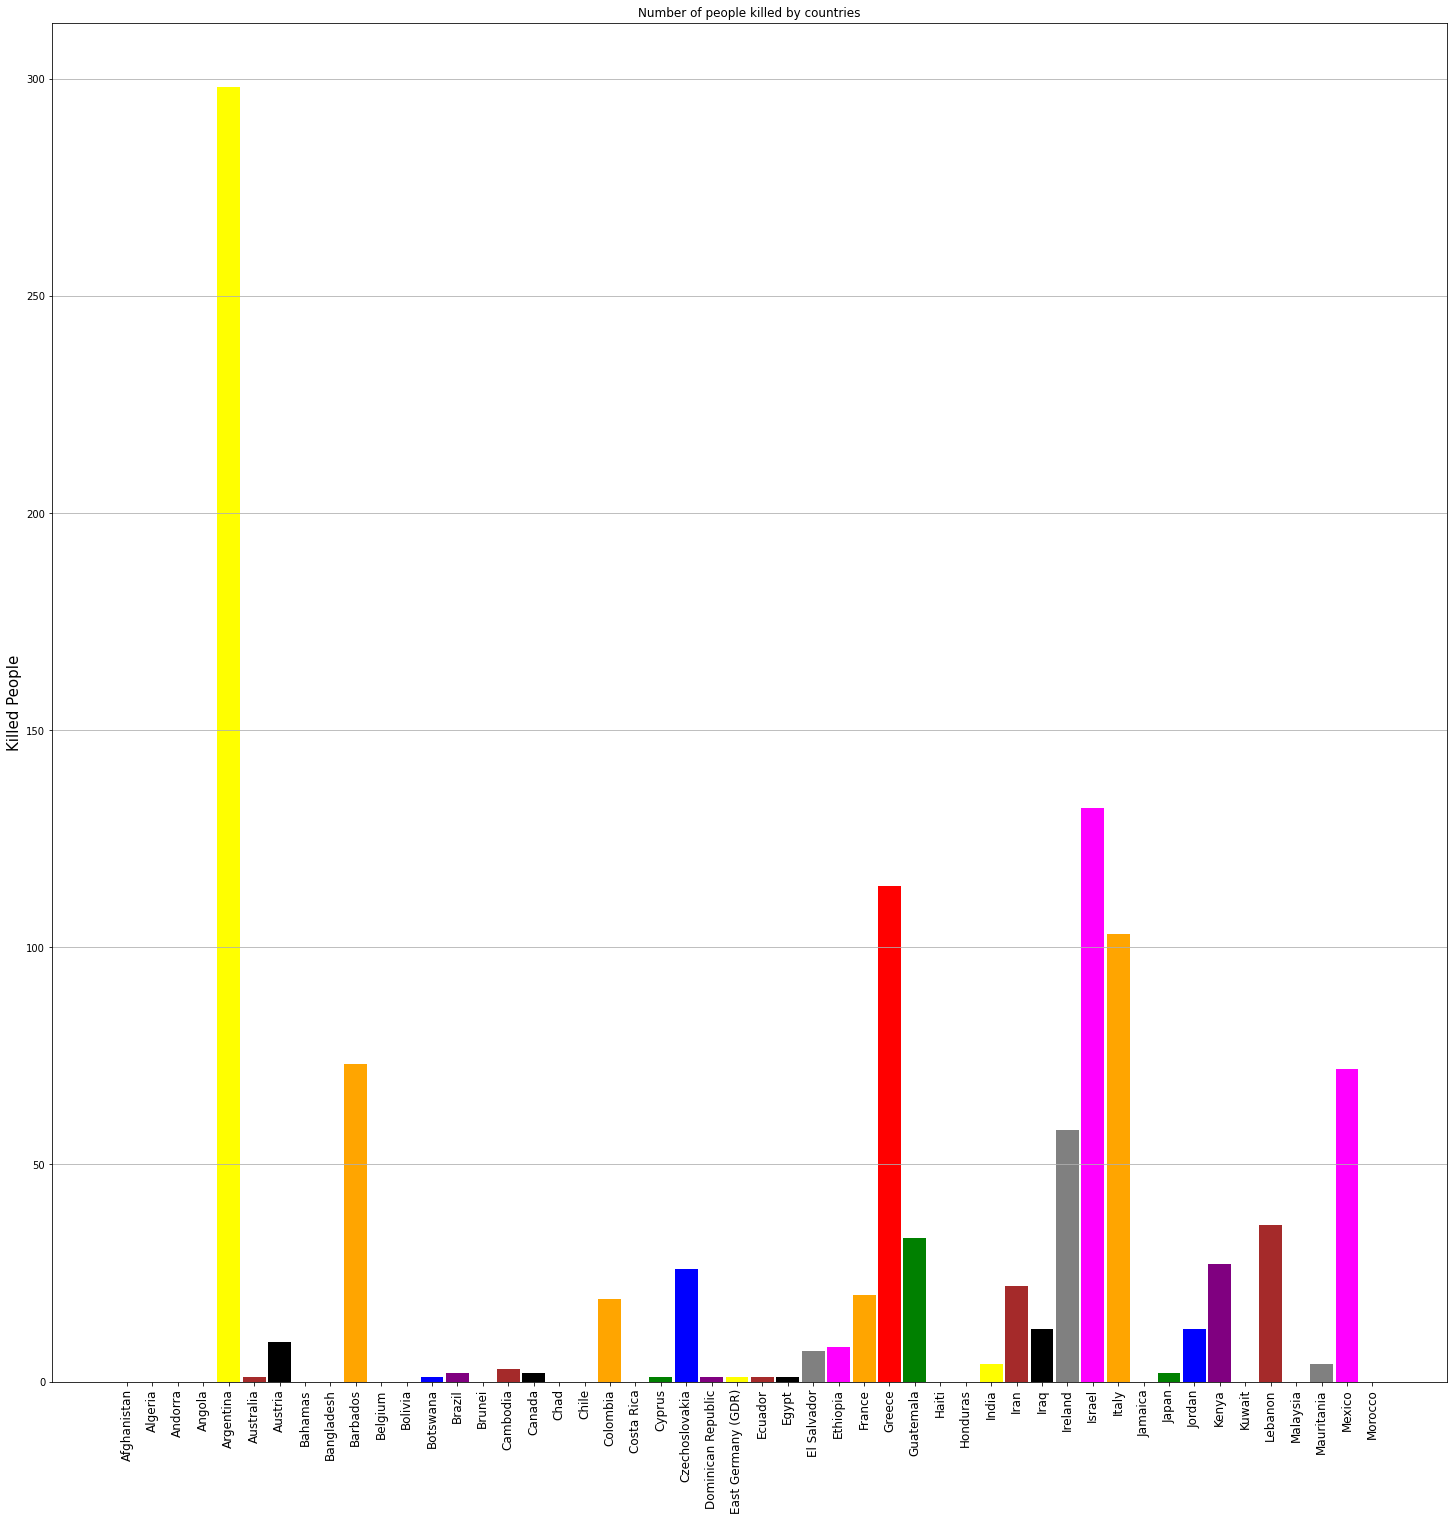

In [ ]:

fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

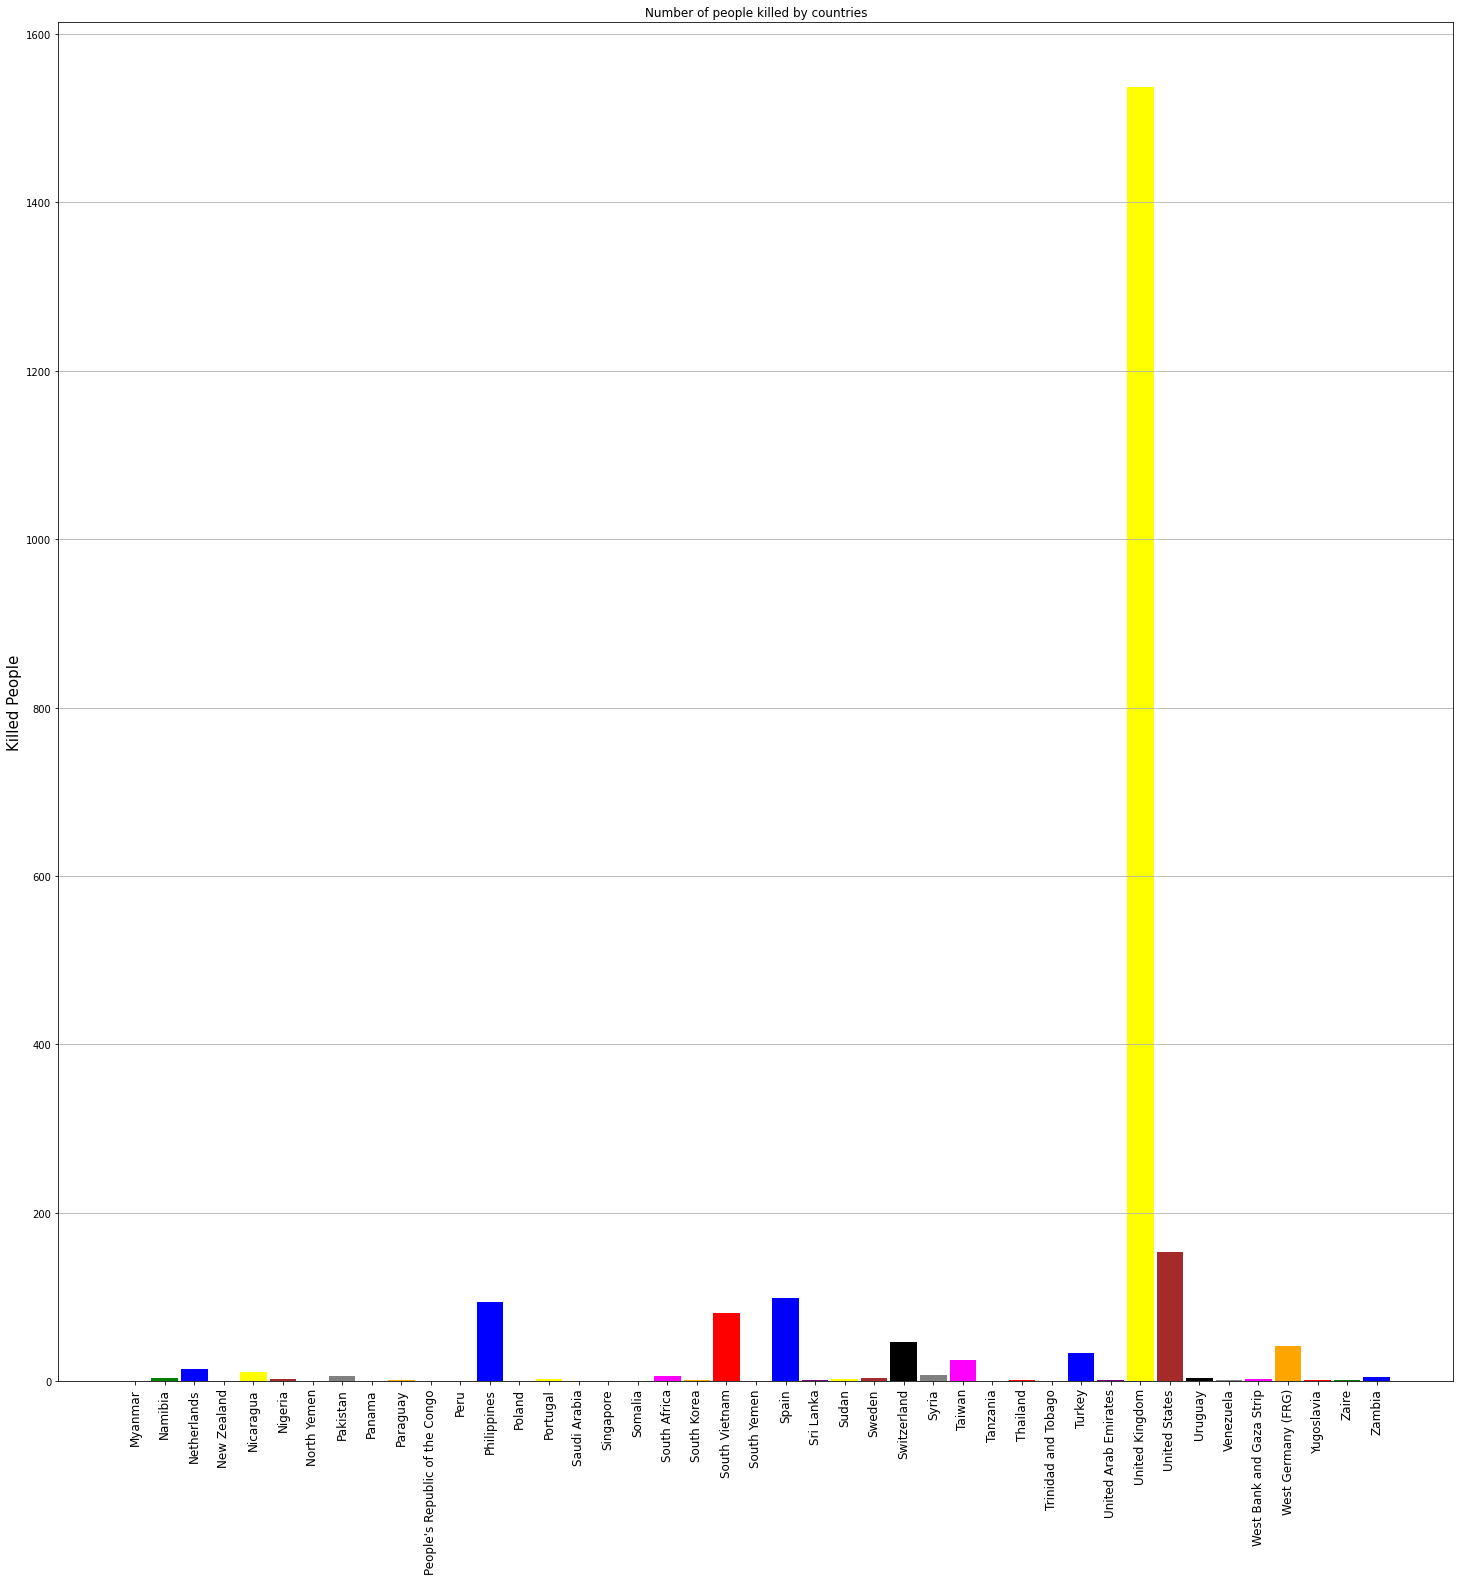

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

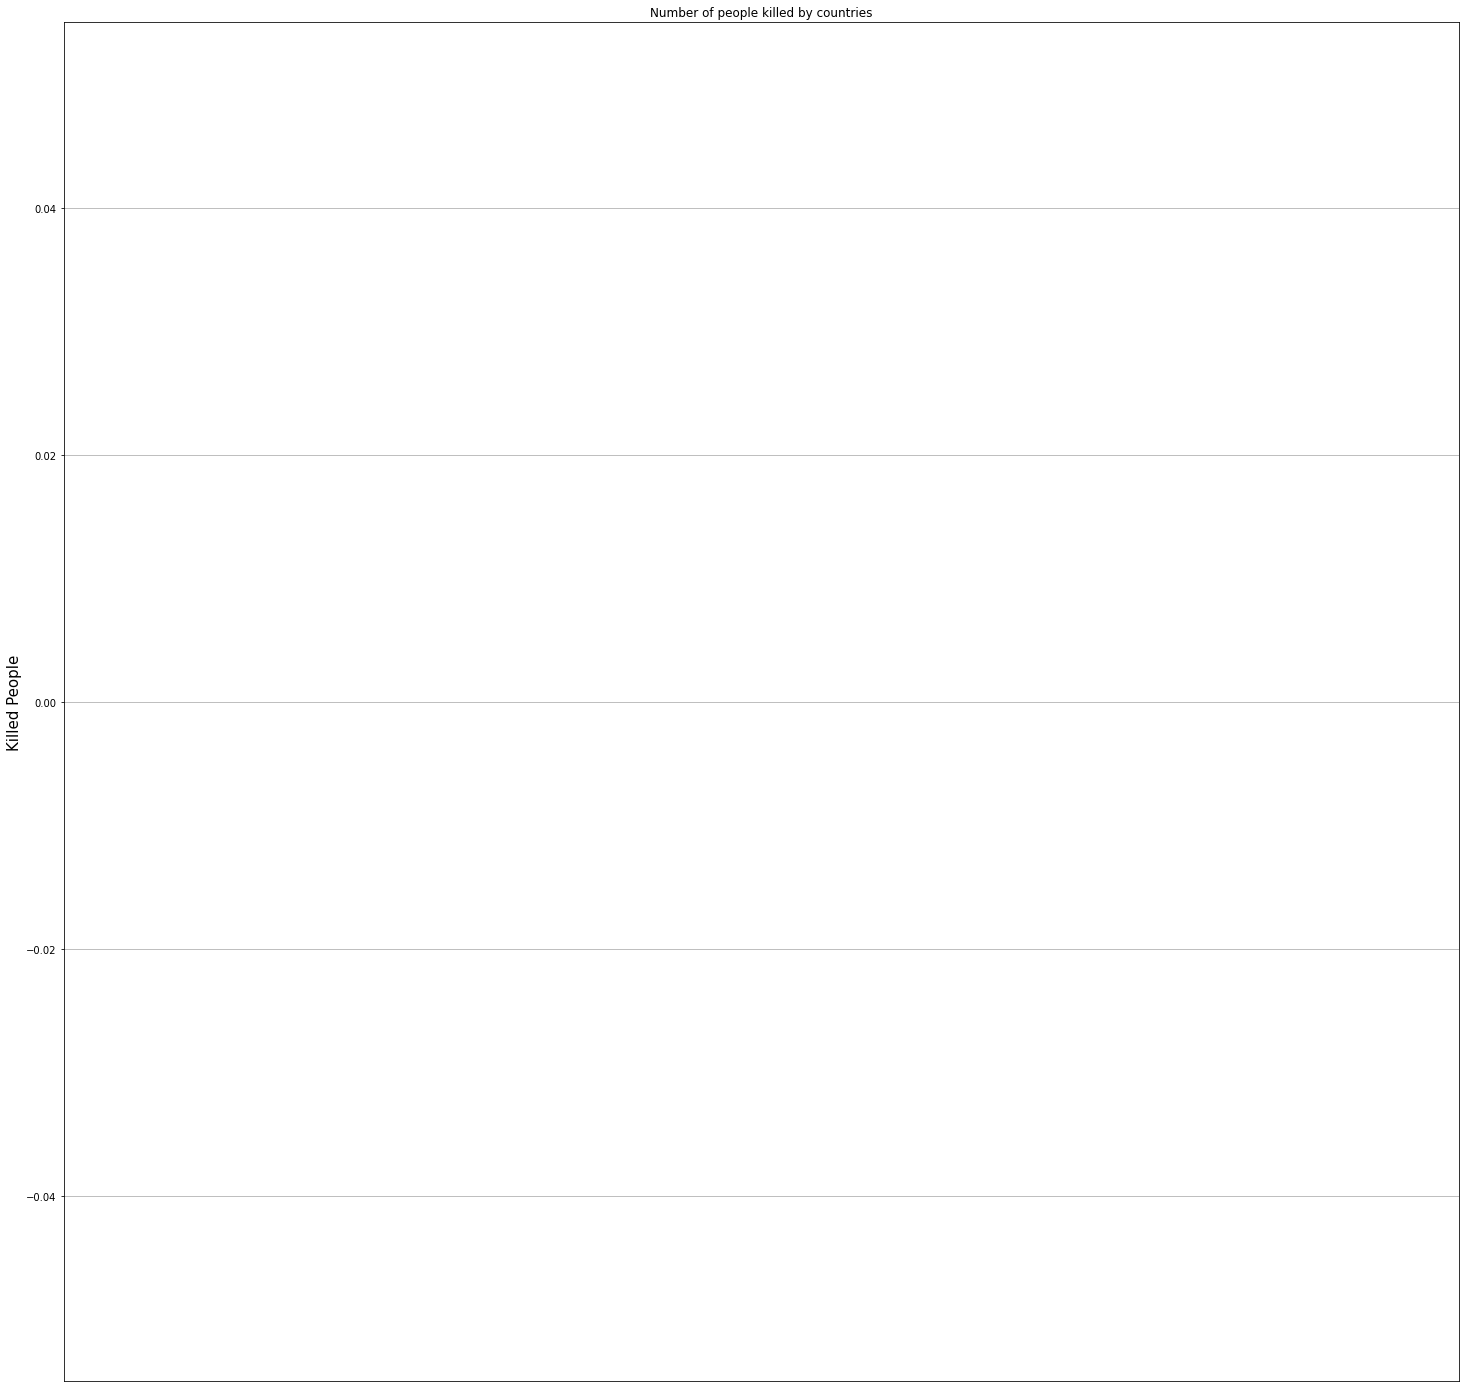

In [ ]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries